In [6]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import csv data
data = pd.read_csv('Documents\car_age_price.csv')

 Data Preprocessing:

In [7]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [8]:
data.shape

(112, 2)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [10]:
data.isna().sum()

Year     0
Price    0
dtype: int64

In [11]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


Data Understandings:

In [ ]:
1)In the given dataset contains price of second-hand Hyundai grand i10 car with respect to year of making.
2)There are 2 coloums,price is the target(dependent variable) and others are independent varible.
3)There is no null or missing values in the data set.
4)There are 112 observations are included within this data set.

1. First of all, check whether there is any relationship between price and year

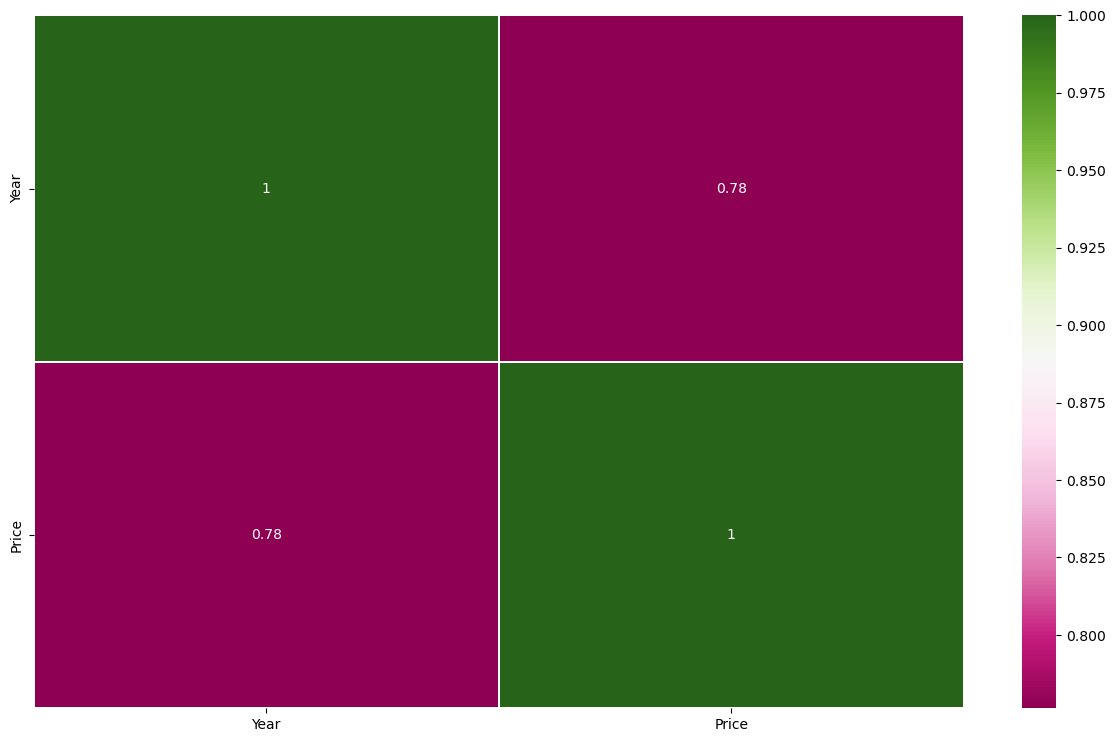

In [12]:
corrmatrix=data.corr()
plt.subplots(figsize=(15,9))
sns.heatmap(corrmatrix,annot=True,linewidth=0.3,cmap="PiYG")
plt.show()

In [30]:
# spliting the data set into  y1 and  x1
from sklearn.model_selection import train_test_split
from sklearn import linear_model
y1=data['Price']
x1=data.drop(['Price'],axis=1)

# spliting our reduced data set into 4 set
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,random_state=42,test_size=0.20)
lr1=linear_model.LinearRegression() # importing linear regression model. we creating an instance lr for its easy usage.
model1=lr1.fit(x1_train,y1_train) #Training the model with xtrain and ytrain datas
print(model1.coef_[0], model1.intercept_)

# we have 3 independant variable (feature)
x1.shape

47608.56780807659 -95520922.49198581


(112, 1)

In [17]:
predictions1=model1.predict(x1_test)

In [18]:
print('The original outputs are:\n',y1_test,'\n') # y1_test is the original output
print((y1_test.nunique()),'observations are taken for testing \n')
print('The predicted outputs are :\n',predictions1)

The original outputs are:
 40     525000
65     495000
4      465000
47     450000
42     550000
69     300000
26     550000
11     500000
10     500000
44     550000
73     320000
55     550000
68     465000
97     640000
0      465000
18     500000
53     345000
80     390000
103    375000
91     520000
36     550000
12     500000
31     550000
Name: Price, dtype: int64 

13 observations are taken for testing 

The predicted outputs are :
 [600775.91252081 505558.77690466 553167.34471273 553167.34471273
 553167.34471273 410341.6412885  505558.77690466 553167.34471273
 600775.91252081 600775.91252081 315124.50567235 505558.77690466
 410341.6412885  648384.48032889 553167.34471273 600775.91252081
 315124.50567235 410341.6412885  505558.77690466 505558.77690466
 505558.77690466 505558.77690466 505558.77690466]


In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse1=mean_squared_error(y1_test,predictions1)
print('MSE is :',mean_squared_error(y1_test,predictions1))
print('Rounded MSE value is %0.2f'%mean_squared_error(y1_test,predictions1))
rsquare1=r2_score(y1_test,predictions1)
print('R^2 value :',r2_score(y1_test,predictions1))
print('Rounded R^2 value : %0.2f'%r2_score(y1_test,predictions1))

MSE is : 4326906256.829671
Rounded MSE value is 4326906256.83
R^2 value : 0.36759313425902185
Rounded R^2 value : 0.37


In [33]:
# Lasso Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
y1=data['Price']
x1=data.drop(['Price'],axis=1)

# spliting our reduced data set into 4 set
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,random_state=42,test_size=0.20)
lasso=Lasso(alpha=1) # importing linear regression model. we creating an instance lr for its easy usage.
model2=lasso.fit(x1_train,y1_train) #Training the model with xtrain and ytrain datas
print(model2.coef_[0], model2.intercept_)

# we have 3 independant variable (feature)
x1.shape

47608.155599500424 -95520091.24791841


(112, 1)

In [25]:
predictions1=model1.predict(x1_test)

In [32]:
print('The original outputs are:\n',y1_test,'\n') # y1_test is the original output
print((y1_test.nunique()),'observations are taken for testing \n')
print('The predicted outputs are :\n',predictions1)

The original outputs are:
 40     525000
65     495000
4      465000
47     450000
42     550000
69     300000
26     550000
11     500000
10     500000
44     550000
73     320000
55     550000
68     465000
97     640000
0      465000
18     500000
53     345000
80     390000
103    375000
91     520000
36     550000
12     500000
31     550000
Name: Price, dtype: int64 

13 observations are taken for testing 

The predicted outputs are :
 [600774.90747294 505558.59627394 553166.75187345 553166.75187345
 553166.75187345 410342.28507493 505558.59627394 553166.75187345
 600774.90747294 600774.90747294 315125.97387594 505558.59627394
 410342.28507493 648383.06307244 553166.75187345 600774.90747294
 315125.97387594 410342.28507493 505558.59627394 505558.59627394
 505558.59627394 505558.59627394 505558.59627394]


In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse1=mean_squared_error(y1_test,predictions1)
print('MSE is :',mean_squared_error(y1_test,predictions1))
print('Rounded MSE value is %0.2f'%mean_squared_error(y1_test,predictions1))
rsquare1=r2_score(y1_test,predictions1)
print('R^2 value :',r2_score(y1_test,predictions1))
print('Rounded R^2 value : %0.2f'%r2_score(y1_test,predictions1))

MSE is : 4326859771.015669
Rounded MSE value is 4326859771.02
R^2 value : 0.3675999284778446
Rounded R^2 value : 0.37


Findings:

1)Predicted Price by Model1 by Linear Regression is 4326906256.829671, which is higher than Model2(Lasso Regression)'s prediction 4326859771.015669
2)So,Linear Refressions is better that Lasso.